In [1]:
import sys
sys.path.append('/usr/local/lib')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcol
import matplotlib.cm as cm
import math
import time
import json
import pyrealsense2 as rs
import cv2
from itertools import cycle
cycol = cycle('bgrcmk') #here I'm generating a list of colors I can plot

In [3]:
# Enabling Advanced Mode

DS5_product_ids = ["0AD1", "0AD2", "0AD3", "0AD4", "0AD5", "0AF6", "0AFE", "0AFF", "0B00", "0B01", "0B03", "0B07"]

def find_device_that_supports_advanced_mode() :
    ctx = rs.context()
    ds5_dev = rs.device()
    devices = ctx.query_devices();
    for dev in devices:
        if dev.supports(rs.camera_info.product_id) and str(dev.get_info(rs.camera_info.product_id)) in DS5_product_ids:
            if dev.supports(rs.camera_info.name):
                print("Found device that supports advanced mode:", dev.get_info(rs.camera_info.name))
            return dev
    raise Exception("No device that supports advanced mode was found")

try:
    dev = find_device_that_supports_advanced_mode()
    advnc_mode = rs.rs400_advanced_mode(dev)
    print("Advanced mode is", "enabled" if advnc_mode.is_enabled() else "disabled")

    # Loop until we successfully enable advanced mode
    while not advnc_mode.is_enabled():
        print("Trying to enable advanced mode...")
        advnc_mode.toggle_advanced_mode(True)
        # At this point the device will disconnect and re-connect.
        print("Sleeping for 5 seconds...")
        time.sleep(5)
        # The 'dev' object will become invalid and we need to initialize it again
        dev = find_device_that_supports_advanced_mode()
        advnc_mode = rs.rs400_advanced_mode(dev)
        print("Advanced mode is", "enabled" if advnc_mode.is_enabled() else "disabled")

    
except Exception as e:
    print(e)
pass

Found device that supports advanced mode: Intel RealSense D415
Advanced mode is enabled


In [4]:
#Here I am getting the current values of all of the camera controls
current_ae_control=advnc_mode.get_ae_control()
current_census=advnc_mode.get_census()
current_color_control=advnc_mode.get_color_control()
current_color_correction=advnc_mode.get_color_correction()
current_depth_control=advnc_mode.get_depth_control()
current_depth_table=advnc_mode.get_depth_table()
current_hdad=advnc_mode.get_hdad()
current_rau_support_vector_control=advnc_mode.get_rau_support_vector_control()
current_rau_thresholds_control=advnc_mode.get_rau_thresholds_control()
current_rsm=advnc_mode.get_rsm()
current_slo_color_thresholds_control=advnc_mode.get_slo_color_thresholds_control()
current_slo_penalty_control=advnc_mode.get_slo_penalty_control()

In [5]:
#Here are some important parameters values

#Decent Defaults
paramvector=[400,9,9,0,0,0,0,0,.461914,.540039,.540039,.208008,-.332031,-.212891,-.212891,.68457,.930664,-.553711,-.553711,.458984,500,7,325,2,10,1,2047,0,0,65536,0,1000,0,0,0,800,26,1,1,3,1,1,3,0,0,51,51,51,4,63,0,1,72,72,72,60,105,70]
#Min Values
minparams=[400,1,1,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,800,26,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1]
#Max Values
maxparams=[400,9,9,1,1,1,1,1,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,-1.99902,1023,1023,1023,2047,255,1023,4095,1023,4095,65536,65536,10000,1,512,0,800,26,7,3,7,3,7,15,4,4,1022,1022,1022,7.96875,168,1,3.96875,1022,1022,1022,511,511,511]

In [6]:
#I can set the value of any of the parametes by first changing a value within the advnc_mode.get object
current_ae_control.meanIntensitySetPoint=paramvector[0]

current_census.uDiameter=paramvector[1]
current_census.vDiameter=paramvector[2]

current_color_control.disableRAUColor=paramvector[3]
current_color_control.disableSADColor=paramvector[4]
current_color_control.disableSADNormalize=paramvector[5]
current_color_control.disableSLOLeftColor=paramvector[6]
current_color_control.disableSLORightColor=paramvector[7]

current_color_correction.colorCorrection1=paramvector[8]
current_color_correction.colorCorrection2=paramvector[9]
current_color_correction.colorCorrection3=paramvector[10]
current_color_correction.colorCorrection4=paramvector[11]
current_color_correction.colorCorrection5=paramvector[12]
current_color_correction.colorCorrection6=paramvector[13]
current_color_correction.colorCorrection7=paramvector[14]
current_color_correction.colorCorrection8=paramvector[15]
current_color_correction.colorCorrection9=paramvector[16]
current_color_correction.colorCorrection10=paramvector[17]
current_color_correction.colorCorrection11=paramvector[18]
current_color_correction.colorCorrection12=paramvector[19]

current_depth_control.deepSeaMedianThreshold=paramvector[20]
current_depth_control.deepSeaNeighborThreshold=paramvector[21]
current_depth_control.deepSeaSecondPeakThreshold=paramvector[22]
current_depth_control.lrAgreeThreshold=paramvector[23]
current_depth_control.minusDecrement=paramvector[24]
#current_depth_control.plusIncrement
current_depth_control.scoreThreshA=paramvector[25]
current_depth_control.scoreThreshB=paramvector[26]
current_depth_control.textureCountThreshold=paramvector[27]
current_depth_control.textureDifferenceThreshold=paramvector[28]

current_depth_table.depthClampMax=paramvector[29]
current_depth_table.depthClampMin=paramvector[30]
current_depth_table.depthUnits=paramvector[31]
current_depth_table.disparityMode=paramvector[32]
current_depth_table.disparityShift=paramvector[33]

current_hdad.ignoreSAD=paramvector[34]
current_hdad.lambdaAD=paramvector[35]
current_hdad.lambdaCensus=paramvector[36]

current_rau_support_vector_control.minEast=paramvector[37]
current_rau_support_vector_control.minNorth=paramvector[38]
current_rau_support_vector_control.minNSsum=paramvector[39]
current_rau_support_vector_control.minSouth=paramvector[40]
current_rau_support_vector_control.minWest=paramvector[41]
current_rau_support_vector_control.minWEsum=paramvector[42]
current_rau_support_vector_control.uShrink=paramvector[43]
current_rau_support_vector_control.vShrink=paramvector[44]

current_rau_thresholds_control.rauDiffThresholdBlue=paramvector[45]
current_rau_thresholds_control.rauDiffThresholdGreen=paramvector[46]
current_rau_thresholds_control.rauDiffThresholdRed=paramvector[47]

current_rsm.diffThresh=paramvector[48]
current_rsm.removeThresh=paramvector[49]
current_rsm.rsmBypass=paramvector[50]
current_rsm.sloRauDiffThresh=paramvector[51]

current_slo_color_thresholds_control.diffThresholdBlue=paramvector[52]
current_slo_color_thresholds_control.diffThresholdGreen=paramvector[53]
current_slo_color_thresholds_control.diffThresholdRed=paramvector[54]

current_slo_penalty_control.sloK1Penalty=paramvector[55]
current_slo_penalty_control.sloK1PenaltyMod1=paramvector[56]
current_slo_penalty_control.sloK1PenaltyMod2=paramvector[57]

In [7]:
#Then I can tell the camera to set the value to the new control group
print(advnc_mode.get_depth_control())
default_depth_control=advnc_mode.get_depth_control()
advnc_mode.set_depth_control(current_depth_control)
print(advnc_mode.get_depth_control()) #notice how the lrAgreeThreshold is equal to 2

minusDecrement: 85, deepSeaMedianThreshold: 3, scoreThreshA: 758, scoreThreshB: 1307, textureDifferenceThreshold: 1054, textureCountThreshold: 42, deepSeaSecondPeakThreshold: 811, deepSeaNeighborThreshold: 955, lrAgreeThreshold: 822
minusDecrement: 10, deepSeaMedianThreshold: 500, scoreThreshA: 1, scoreThreshB: 2047, textureDifferenceThreshold: 0, textureCountThreshold: 0, deepSeaSecondPeakThreshold: 325, deepSeaNeighborThreshold: 7, lrAgreeThreshold: 2


In [8]:
print(paramvector[21:28])

[7, 325, 2, 10, 1, 2047, 0]


In [9]:
def randomize_depth_control():
    current_depth_control.deepSeaMedianThreshold=random.randint(minparams[20],maxparams[20])
    current_depth_control.deepSeaNeighborThreshold=random.randint(minparams[21],maxparams[21])
    current_depth_control.deepSeaSecondPeakThreshold=random.randint(minparams[22],maxparams[22])
    current_depth_control.lrAgreeThreshold=random.randint(minparams[23],maxparams[23])
    current_depth_control.minusDecrement=random.randint(minparams[24],maxparams[24])
    current_depth_control.scoreThreshA=random.randint(minparams[25],maxparams[25])
    current_depth_control.scoreThreshB=random.randint(minparams[26],maxparams[26])
    current_depth_control.textureCountThreshold=random.randint(minparams[27],maxparams[27])
    current_depth_control.textureDifferenceThreshold=random.randint(minparams[28],maxparams[28])
    advnc_mode.set_depth_control(current_depth_control)

In [10]:
# Function for Saving Parameters into a JSON file
def writeD415Json(path,filename,values):
    filepathname= './' + path + filename + '.json'
    parameters={}
    parameters["aux-param-autoexposure-setpoint"]=str(values[0])
    parameters["aux-param-colorcorrection1"]=str(values[1])
    parameters["aux-param-colorcorrection10"]=str(values[2])
    parameters["aux-param-colorcorrection11"]=str(values[3])
    parameters["aux-param-colorcorrection12"]=str(values[4]) 
    parameters["aux-param-colorcorrection2"]=str(values[5])
    parameters["aux-param-colorcorrection3"]=str(values[6])
    parameters["aux-param-colorcorrection4"]=str(values[7]) 
    parameters["aux-param-colorcorrection5"]=str(values[8])
    parameters["aux-param-colorcorrection6"]=str(values[9])
    parameters["aux-param-colorcorrection7"]=str(values[10])
    parameters["aux-param-colorcorrection8"]=str(values[11])
    parameters["aux-param-colorcorrection9"]=str(values[12])
    parameters["aux-param-depthclampmax"]=str(values[13])
    parameters["aux-param-depthclampmin"]=str(values[14])
    parameters["aux-param-disparityshift"]=str(values[15])
    parameters["controls-autoexposure-auto"]=str(values[16])
    parameters["controls-autoexposure-manual"]=str(values[17])
    parameters["controls-color-autoexposure-auto"]=str(values[18])
    parameters["controls-color-autoexposure-manual"]=str(values[19])
    parameters["controls-color-backlight-compensation"]=str(values[20])
    parameters["controls-color-brightness"]=str(values[21])
    parameters["controls-color-contrast"]=str(values[22])
    parameters["controls-color-gain"]=str(values[23])
    parameters["controls-color-gamma"]=str(values[24])
    parameters["controls-color-hue"]=str(values[25])
    parameters["controls-color-power-line-frequency"]=str(values[26])
    parameters["controls-color-saturation"]=str(values[27])
    parameters["controls-color-sharpness"]=str(values[28])
    parameters["controls-color-white-balance-auto"]=str(values[29])
    parameters["controls-color-white-balance-manual"]=str(values[30])
    parameters["controls-depth-gain"]=str(values[31])
    parameters["controls-depth-white-balance-auto"]=str(values[32])
    parameters["controls-laserpower"]=str(values[33])
    parameters["controls-laserstate"]=str(values[34])
    parameters["ignoreSAD"]=str(values[35])
    parameters["param-autoexposure-setpoint"]=str(values[36])
    parameters["param-censusenablereg-udiameter"]=str(values[37])
    parameters["param-censusenablereg-vdiameter"]=str(values[38])
    parameters["param-censususize"]=str(values[39])
    parameters["param-censusvsize"]=str(values[40])
    parameters["param-depthclampmax"]=str(values[41]) 
    parameters["param-depthclampmin"]=str(values[42]) 
    parameters["param-depthunits"]=str(values[43])
    parameters["param-disableraucolor"]=str(values[44])
    parameters["param-disablesadcolor"]=str(values[45])
    parameters["param-disablesadnormalize"]=str(values[46])
    parameters["param-disablesloleftcolor"]=str(values[47])
    parameters["param-disableslorightcolor"]=str(values[48]) 
    parameters["param-disparitymode"]=str(values[49])
    parameters["param-disparityshift"]=str(values[50])
    parameters["param-lambdaad"]=str(values[51])
    parameters["param-lambdacensus"]=str(values[52])
    parameters["param-leftrightthreshold"]=str(values[53]) 
    parameters["param-maxscorethreshb"]=str(values[54])
    parameters["param-medianthreshold"]=str(values[55])
    parameters["param-minscorethresha"]=str(values[56])
    parameters["param-neighborthresh"]=str(values[57])
    parameters["param-raumine"]=str(values[58])
    parameters["param-rauminn"]=str(values[59])
    parameters["param-rauminnssum"]=str(values[60])
    parameters["param-raumins"]=str(values[61])
    parameters["param-rauminw"]=str(values[62])
    parameters["param-rauminwesum"]=str(values[63])
    parameters["param-regioncolorthresholdb"]=str(values[64])
    parameters["param-regioncolorthresholdg"]=str(values[65])
    parameters["param-regioncolorthresholdr"]=str(values[66]) 
    parameters["param-regionshrinku"]=str(values[67])
    parameters["param-regionshrinkv"]=str(values[68])
    parameters["param-robbinsmonrodecrement"]=str(values[69])
    parameters["param-robbinsmonroincrement"]=str(values[70])
    parameters["param-rsmdiffthreshold"]=str(values[71])
    parameters["param-rsmrauslodiffthreshold"]=str(values[72]) 
    parameters["param-rsmremovethreshold"]=str(values[73]) 
    parameters["param-scanlineedgetaub"]=str(values[74])
    parameters["param-scanlineedgetaug"]=str(values[75]) 
    parameters["param-scanlineedgetaur"]=str(values[76]) 
    parameters["param-scanlinep1"]=str(values[77]) 
    parameters["param-scanlinep1onediscon"]=str(values[78]) 
    parameters["param-scanlinep1twodiscon"]=str(values[79])
    parameters["param-scanlinep2"]=str(values[80])
    parameters["param-scanlinep2onediscon"]=str(values[81])
    parameters["param-scanlinep2twodiscon"]=str(values[82])
    parameters["param-secondpeakdelta"]=str(values[83])
    parameters["param-texturecountthresh"]=str(values[84])
    parameters["param-texturedifferencethresh"]=str(values[85])
    parameters["param-usersm"]=str(values[86]) 
    parameters["param-zunits"]=str(values[87])
    
    with open(filepathname, 'w') as fp: #open file to write parameters
        json.dump(parameters, fp) # dump parameters into json


In [11]:
#values of some preset parameters. This is the list that will change in very loop of the SGD
values= [400, 0.461914, -0.553711, -0.553711, 0.0458984, 0.540039, 0.540039, 0.208008, -0.332031, -0.212891, -0.212891, 0.68457, 0.930664, 65536, 624, 53, "True", 33000, "True", 166, 0, 0 , 50, 64, 300, 0, 3, 64, 50, "True", 4600, 16, "False", 150, "on", 0, 400, 9, 9, 9, 9, 65536, 624, 901, 0, 0, 0, 0, 0, 0, 53, 800, 26, 24, 2047, 500, 1, 7, 1, 1, 3, 1, 1, 3, 0.0499022, 0.0499022, 0.0499022, 3, 1, 10, 10, 4, 1, 0.375, 72, 72, 72, 60, 105, 70, 342, 190, 130, 325, 0, 0, 1, 901] 

In [12]:
# Create file named D415_params.json and write the parameter values into that json file (Saved in the current path) 
filename='D415_params' 
path='./'
writeD415Json(path,filename,values)

In [13]:
print('The lrAgreeThreshold in the Pre-saved JSON is',(values[53]))

The lrAgreeThreshold in the Pre-saved JSON is 24


In [14]:
# Loading presaved parameters 
# If I have another set of parameters I'd like to use already in the json format, I can skip the previous three blocks of code
    
with open("D415_params.json") as json_data: #Json file to be loaded
    starting_params = json.load(json_data)
    starting_params=str(starting_params).replace("'", '\"') #IF YOU DON't DO THIS IT WILL NOT WORK with the librealsense sdk
    print(starting_params)

{"param-disableraucolor": "0", "param-depthclampmax": "65536", "param-disablesadnormalize": "0", "param-scanlinep1twodiscon": "70", "param-neighborthresh": "7", "controls-color-contrast": "50", "aux-param-colorcorrection8": "0.68457", "param-leftrightthreshold": "24", "param-robbinsmonroincrement": "10", "controls-autoexposure-manual": "33000", "param-disablesloleftcolor": "0", "param-medianthreshold": "500", "param-regionshrinkv": "1", "param-rauminwesum": "3", "controls-laserpower": "150", "param-regioncolorthresholdb": "0.0499022", "param-censusvsize": "9", "param-regioncolorthresholdr": "0.0499022", "aux-param-colorcorrection3": "0.540039", "param-scanlineedgetaur": "72", "param-scanlinep2twodiscon": "130", "param-disparityshift": "53", "param-secondpeakdelta": "325", "param-scanlinep2": "342", "param-minscorethresha": "1", "param-zunits": "901", "aux-param-disparityshift": "53", "aux-param-colorcorrection4": "0.208008", "param-scanlineedgetaub": "72", "aux-param-colorcorrection9":

In [15]:
#Recording Loop Initializations 

#camera specications
frame_width=848
frame_height=480
fps=90

#optimization specifications
number_of_frames_to_record=1000
background_chunk=int(number_of_frames_to_record/2) #I want to use 500 frames for recording the background

#open a file for apending binary data
file = open('pythondepthdata.bin', 'a+b')

# Configure depth stream
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, frame_width, frame_height, rs.format.z16, fps)
#config.enable_stream(rs.stream.color, frame_width, frame_height, rs.format.bgr8, fps)
advnc_mode.load_json(starting_params) #this is where I start with the Defualt Json

# Start streaming
cfg = pipeline.start(config)
dev = cfg.get_device()
depth_sensor = dev.first_depth_sensor()

In [16]:
start_of_loop=time.time()
saveddepthparams=[]
saveddepthparams.append(advnc_mode.get_depth_control())
objectparamindex=0 #used to index the background parameters used in saveddepthparams list
tick=0; #keeping track of the number of loops the experiment has gone through 

#Main Recording Loop 

with open('pythondepthdata.bin','ab') as binarydata: #While the file called "pythonedpthdata.bin" is open for appending binary, 
    try:
        while tick<number_of_frames_to_record: 
            
            #First I want to record just the background with random params
            if (tick != 0) and tick<background_chunk: #avoid division by zero
                if tick%100==0: #every 100 frames I want to randomize the current depth control
                    randomize_depth_control()
                    saveddepthparams.append(advnc_mode.get_depth_control())
                    print("randomized background " + str(tick))
            
            # This is where I prompt the user to insert a calibration object
            if tick==background_chunk:
                output=input("Please insert a calibration object and type the name of the object you've inserted  ")
                
                
            #Next, I want to record an object in the same set of background parameters (that were randomly generated)        
            if background_chunk<=tick<=number_of_frames_to_record and tick%100==0:
                    advnc_mode.set_depth_control(saveddepthparams[objectparamindex])
                    saveddepthparams.append(advnc_mode.get_depth_control())
                    objectparamindex=objectparamindex+1
                    print("Changed object recording parameters to that of background-" + str(objectparamindex))             
            # Wait for a coherent pair of frames: depth and color
            frames=pipeline.wait_for_frames()
            depth_frame = frames.get_depth_frame()
        
            # Convert images to numpy arrays
            depth_image = np.asanyarray(depth_frame.get_data())
            #color_image = np.asanyarray(color_frame.get_data())
            depth_image.tofile(binarydata) #save data as binarydata (specified by the with open as line)
            
                
            tick=tick+1 

    finally:

        # Stop streaming
        pipeline.stop()
        end_of_loop=time.time() #end timer
        print("Time Elapsed = ", end_of_loop - start_of_loop)
        #serialized_string = advnc_mode.serialize_json() #getting the current parameters as a serialized string
        #as_json_object = json.loads(serialized_string) #loading the json object from the serialized string
        #json_used_in_experiment = str(as_json_object).replace("'", '\"') #converting object into string that can be printed
        #print("Final Parameters = ", json_used_in_experiment)

randomized background 100
randomized background 200
randomized background 300
randomized background 400
Please insert a calibration object and type the name of the object you've inserted  mouse
Changed object recording parameters to that of background-1
Changed object recording parameters to that of background-2
Changed object recording parameters to that of background-3
Changed object recording parameters to that of background-4
Changed object recording parameters to that of background-5
Time Elapsed =  22.861193656921387


In [17]:
#notice how the lrAgreeThreshold is now equal to 2!

In [18]:
#This is where I load the raw data and convert it into a numpy array
rawframes = np.fromfile('pythondepthdata.bin', dtype=np.uint16) #A highly efficient way of reading binary data with a known data-type, as well as parsing simply formatted text files. Data written using the tofile method can be read using this function.
frames = rawframes.reshape(-1, frame_height, frame_width) #.reshape simply restructures data into dimensions of your choosing. -1 means find the number of segments that structures the data into the dimnesions shown afterwards

In [19]:
number_of_frames,video_height,video_width=frames.shape[0],frames.shape[1],frames.shape[2];
#set number of frames equal to the first element in reshaped.shape
#set video height to the second element in reshaped.shape
#set video width to the third element in reshaped.shape
print('The shape of the video is {0} by {1} and it has {2} frames'.format(video_height,video_width,number_of_frames))
#note that the nubmers below are one greater than the actual indices that exist
#there is no reshaped[number_of_frames,height,width], the last frame is reshaped[number_of_frames-1,height-1,width-1]

The shape of the video is 480 by 848 and it has 1000 frames


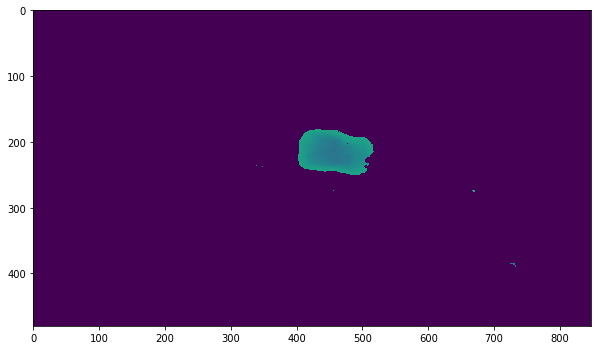

In [20]:
#Now let's try to put this all together but in another random frame
#pick a frame
picked_frame=550
frame_of_interest=frames[picked_frame] 
#know your background (I happen to know background is between frame 5250 and 5350)
backgroundmean=np.mean(frames[0:99], axis=0)
backgroundvariance=np.var(frames[0:99], axis=0)
#if the difference between the background and the frame is greater than expected, it's probably our object! 
#note that I arbitrarily pick 5 stdeviations away, it's worth knowing if the noise is actually gaussian
backgroundmultiplier=np.abs(frame_of_interest - backgroundmean) - (10*np.sqrt(backgroundvariance)) #if its 5 standard its NOISE
#we expect positive values for high differences. make them stay by multiplying by 1
backgroundmultiplier[backgroundmultiplier>0]=1
#we expect negative values or no change for small differences. probably just noise, get rid of them by multiplying by 0
backgroundmultiplier[backgroundmultiplier<=0]=0
#apply our expectations to the matrix
frame_of_interest_backgroundsubtracted=np.multiply(frame_of_interest,backgroundmultiplier)

#I can plot the background subtracted image
fig=plt.figure(figsize=(10,10))
plt.imshow(frame_of_interest_backgroundsubtracted)
object_median=np.median(frame_of_interest_backgroundsubtracted[frame_of_interest_backgroundsubtracted>0])
plt.clim(object_median-100,object_median+100)
fig.savefig('calibration_object.png')

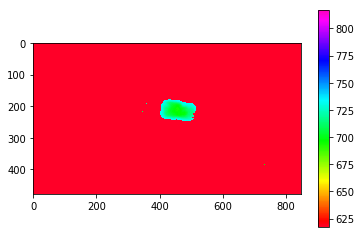

In [21]:
plt.colorbar(plt.imshow(frame_of_interest_backgroundsubtracted,cmap='gist_rainbow'))
plt.clim(object_median-100,object_median+100)

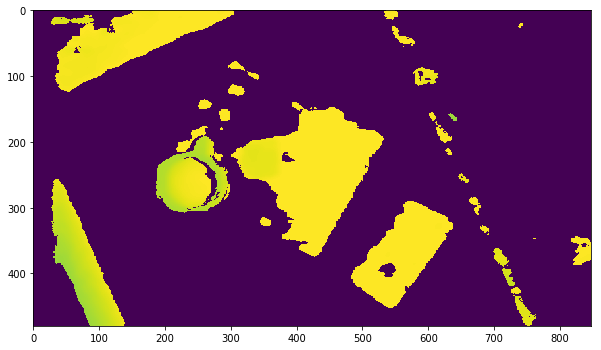

In [22]:
pickedframe=50
frame_of_interest=frames[pickedframe] 
fig=plt.figure(figsize=(10,10))
plt.imshow(frame_of_interest)

In [23]:
#params used for the backgroud should equal the params used for the object
print(saveddepthparams[0:4])
print(saveddepthparams[5:9])

[minusDecrement: 10, deepSeaMedianThreshold: 500, scoreThreshA: 1, scoreThreshB: 2047, textureDifferenceThreshold: 0, textureCountThreshold: 0, deepSeaSecondPeakThreshold: 325, deepSeaNeighborThreshold: 7, lrAgreeThreshold: 24, minusDecrement: 17, deepSeaMedianThreshold: 181, scoreThreshA: 71, scoreThreshB: 3746, textureDifferenceThreshold: 1830, textureCountThreshold: 49, deepSeaSecondPeakThreshold: 767, deepSeaNeighborThreshold: 888, lrAgreeThreshold: 1067, minusDecrement: 96, deepSeaMedianThreshold: 586, scoreThreshA: 641, scoreThreshB: 428, textureDifferenceThreshold: 4025, textureCountThreshold: 19, deepSeaSecondPeakThreshold: 468, deepSeaNeighborThreshold: 128, lrAgreeThreshold: 23, minusDecrement: 6, deepSeaMedianThreshold: 802, scoreThreshA: 54, scoreThreshB: 2310, textureDifferenceThreshold: 502, textureCountThreshold: 19, deepSeaSecondPeakThreshold: 760, deepSeaNeighborThreshold: 323, lrAgreeThreshold: 916]
[minusDecrement: 10, deepSeaMedianThreshold: 500, scoreThreshA: 1, sc